# Checking simplified dynamics

In [1]:
using LinearAlgebra
using PyCall
using PyPlot
include("../scripts/Params.jl");
include("../scripts/SphereConeVehicleModel.jl");

## Design parameters

In [2]:
params = Dict("r_min" => 0.001, # smallest radius of the cone [m]
              "r_max" => 1.30, # largest radius of the cone [m]
              "δ" => 43 / 360 * 2 * pi, # opening angle of the cone [rad]
              "m" => 569.7, # mass of the Phoenix entry system [kg]
              "x_g" => -0.150, # axial center-of-gravity location [m]
              "c" => 1.20, # distance between the radial axis and the cluster of thrusters[m]
              "F_max" => 36.0, # maximum force applied by the thrusters [N]
              "Jxx" => 293.15, # Phoenix entry system [kg.m^2]
              "Jyy" => 184, # Phoenix entry system [kg.m^2]
              "Jzz" => 208.02, # Phoenix entry system [kg.m^2]
              "Jxy" => 0.451, # Phoenix entry system [kg.m^2]
              "Jxz" => -4.424, # Phoenix entry system [kg.m^2] 
              "Jyz" => 0.372, # Phoenix entry system [kg.m^2]
              "g" => 3.711, # Mars gravity [m^2.s^-1]
              "h" => 10800, # Atmospheric Scale Height [m]
              "ρ_0" => 0.020, # Surface density of Mars atmosphere [kg.m^-3]
              "r_p" => 3389.5e3, # Volumetric mean radius of Mars [m]
              "ω_p" => [0, 0, 7.088e-05]) # Angular velocity of Mars [rad.s^-1]
complete_params!(params);

## Simplified Dynamics Model
- We assume flat planet model, gravity acceleration is directed along the x axis.
- We assume constant uniform of the atmosphere.
- We assume that the fluid is static.

In [38]:
# Initial conditions

# Iniitial altitude
x_0 = - 125000.0 - 3389.5e3

# Initial speed
v_0 = 5500 * [1, 0, 0]

# Initial orientation
q_0 = [1, 0, 0, 0]
q_0 = [1, 0, 0, 0.04]
q_0 = q_0 / norm(q_0)
    
θ = 0.08
r = tan(θ / 4) .* [0, 0, 1]
# Initial state
X_0_quat = [x_0, 0, 0, q_0[1], q_0[2], q_0[3], q_0[4], v_0[1], v_0[2], v_0[3], 0, 0, 0]
X_0 = [x_0, 0, 0, r[1], r[2], r[3], v_0[1], v_0[2], v_0[3], 0, 0, 0]

12-element Array{Float64,1}:
   -3.5145e6            
    0.0                 
    0.0                 
    0.0                 
    0.0                 
    0.020002667093402423
 5500.0                 
    0.0                 
    0.0                 
    0.0                 
    0.0                 
    0.0                 

## Derivative 

In [39]:
u = zeros(12,1)
X_dot = entry_vehicle_simplified_dynamics(X_0, u, params)

13×1 Array{Float64,2}:
  5500.0                   
     0.0                   
     0.0                   
     0.0                   
     0.0                   
     0.0                   
 -5413.866521390815        
  -420.74651481941333      
     2.7003495300265655e-10
    -9.879476217795793e-16 
     5.248952548670835e-6  
  -196.60867617127215      
     0.0                   

In [40]:
X_dot = entry_vehicle_quat_simplified_dynamics(X_0_quat, u, params)

13×1 Array{Float64,2}:
  5500.0                   
     0.0                   
     0.0                   
     0.0                   
     0.0                   
     0.0                   
     0.0                   
 -5413.920311179818        
  -420.52563693125495      
     2.7003667231081345e-10
    -9.879696852031096e-16 
     5.241694094873821e-6  
  -196.5048134926686       

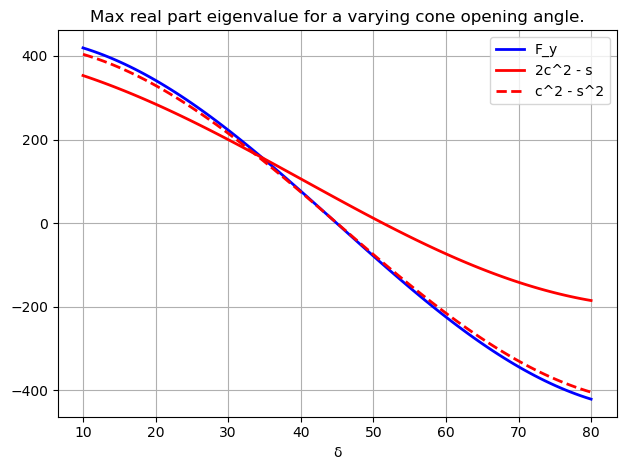

In [42]:
function plot_F_y(params, num_nodes; display=true)
    δ_vect = range(10, stop=80, length=num_nodes) / 360 * 2 * pi
    F_y = zeros(num_nodes)
    for i=1:num_nodes
        δ = δ_vect[i]
        params["δ"] = δ
        complete_params!(params)
        F_y[i] = entry_vehicle_simplified_dynamics(X_0, u, params)[8]
        
    end
    plot(δ_vect.*(360/2/pi), F_y, color="blue", linewidth=2.0, linestyle="-", label="F_y")
    plot(δ_vect.*(360/2/pi), 200*(2*cos.(δ_vect).^2 - sin.(δ_vect)), color="red", linewidth=2.0, linestyle="-", label="2c^2 - s")
    plot(δ_vect.*(360/2/pi), 430*(cos.(δ_vect).^2 - sin.(δ_vect).^2), color="red", linewidth=2.0, linestyle="--", label="c^2 - s^2")
    legend()
    xlabel("δ")
    title("Max real part eigenvalue for a varying cone opening angle.")
    grid("on")
    if display 
        tight_layout()
        show()
    end
    return F_y
end

num_nodes = 100
plot_F_y(params, num_nodes);